In [1]:
using TCI4Keldysh
using PythonCall
using PythonPlot
using LaTeXStrings

INCH_TO_PT = 72
PT_TO_INCH = 1.0/INCH_TO_PT
COLUMN_PT = 432
COLUMN_INCH = COLUMN_PT*PT_TO_INCH
PLOT_COLUMN_PT = 420
PLOT_COLUMN_INCH = PLOT_COLUMN_PT*PT_TO_INCH
PLOT_PAGE_PT = PLOT_COLUMN_PT*2
PLOT_PAGE_INCH = PLOT_PAGE_PT*PT_TO_INCH

function set_rcParams(fs::Int=12)
    pyplot.rcParams["font.size"] = fs        # Title font size
    # pyplot.rcParams["axes.labelsize"] = fs               # Axis label font size
    pyplot.rcParams["xtick.labelsize"] = fs             # X-axis tick label font size
    pyplot.rcParams["ytick.labelsize"] = fs             # Y-axis tick label font size
    pyplot.rcParams["legend.fontsize"] = fs             # Legend font size
end
set_rcParams(14)

function annotate_topleft(ax, text; color="black")
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(0,1),
    xycoords="axes fraction",
    horizontalalignment="left",
    verticalalignment="top",
    xytext=(+subplotlabeloffset, -subplotlabeloffset),
    textcoords="offset points",
    color=color
    )
end

"""
Save figure including a legend outside the figure (bbox_to_anchor with entries > 1.0)
"""
function save_bbox(name::String, fig, lgd)
    fig.savefig(
        name,
        bbox_extra_artists=(lgd,),
        bbox_inches="tight"
        )
end

function abc_annotate(axs; color="black")
    subplotlabeloffset=3
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    naxs = length(axs.flatten())
    for i in 0:naxs-1
        axs.flatten()[i].annotate(
        "($(alphabet[i+1]))",
        xy=(1,1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top",
        xytext=(-subplotlabeloffset, -subplotlabeloffset),
        textcoords="offset points",
        color=color
        )
    end
end


    CondaPkg Found dependencies: /home/m/M.Frankenbach/.julia/packages/PythonCall/Nr75f/CondaPkg.toml
    CondaPkg Found dependencies: /home/m/M.Frankenbach/.julia/packages/PythonPlot/469aA/CondaPkg.toml
    CondaPkg Dependencies already up to date


abc_annotate (generic function with 1 method)

In [2]:
function onlyJSON(path::AbstractString)
    return only(filter(f -> endswith(f, ".json"), readdir(path; join=true))) 
end

basepath = joinpath(TCI4Keldysh.pdatadir(), "cluster_output")
kcspath = joinpath(TCI4Keldysh.pdatadir(), "cluster_output_KCS")

"/scratch/m/M.Frankenbach/tci4keldysh/cluster_output_KCS"

In [ ]:
# load Matsubara data
d1 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta20")), basepath)
d2 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta200")), basepath)
d3 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")), basepath)

f1 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta20")), basepath)
f2 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta200")), basepath)
f3 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")), basepath)

Dict{String, Any} with 12 entries:
  "flavor_idx" => 1
  "times"      => Any[12905.5]
  "ranks"      => Any[86]
  "tcikwargs"  => Dict{String, Any}()
  "numthreads" => 64
  "bonddims"   => Any[Any[2, 4, 8, 16, 32, 44, 58, 62, 48, 68  …  61, 47, 48, 4…
  "Rs"         => Any[10]
  "PSFpath"    => "/scratch/m/M.Frankenbach/tci4keldysh/data/SIAM_u=0.50/PSF_nz…
  "beta"       => 2000.0
  "channel"    => "p"
  "job_id"     => "3742085"
  "tolerance"  => 0.001

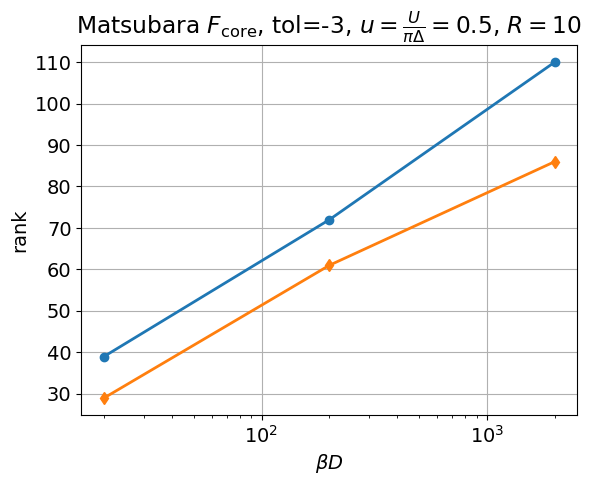

In [23]:
# plot Matsubara core vertex rank for different temperatures
Rs = d1["Rs"]
betas = [20.0, 200.0, 2000.0]
ranks20 = d1["ranks"]
ranks200 = d2["ranks"]
ranks2000 = d3["ranks"]
fullranks20 = f1["ranks"]
fullranks200 = f2["ranks"]
fullranks2000 = f3["ranks"]
betaranks = [d[6] for d in [ranks20,ranks200,ranks2000]]
betafullranks = [only(d) for d in [fullranks20,fullranks200,fullranks2000]]

fig, ax = subplots()
ax.plot(betas, betaranks; label=L"$F_{\mathrm{core}}$", marker="o", linewidth=2)
ax.plot(betas, betafullranks; label=L"F_{\mathrm{full}}", marker="d", linewidth=2)
ax.set_xscale("log")
# plot!(p, Rs, ranks200; label=L"\beta*\Delta=200")
# plot!(p, Rs, ranks2000; label=L"\beta\Delta=2000")
ax.set_title(L"Matsubara $F_{\mathrm{core}}$, tol=-3, $u=\frac{U}{\pi\Delta}=0.5$, $R=10$")
# D: bandwidth
ax.set_xlabel(L"\beta D")
ax.set_ylabel("rank")
ax.grid(true)
savefig("betavsrank.pdf")
display(fig)

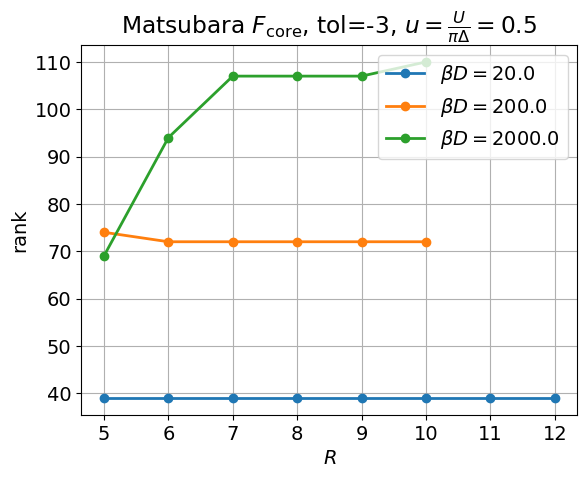

In [26]:
fig, ax = subplots()
for d in [d1,d2,d3]
    ranks = d["ranks"]
    beta = d["beta"]
    ax.plot(d["Rs"][1:length(ranks)], ranks; label=L"\beta D=%$beta", linewidth=2, marker="o")
end
ax.set_xlabel(L"R")
ax.set_ylabel("rank")
ax.set_title(L"Matsubara $F_{\mathrm{core}}$, tol=-3, $u=\frac{U}{\pi\Delta}=0.5$")
ax.grid(true)
ax.legend()
savefig("betaRvsrank.pdf")
display(fig)

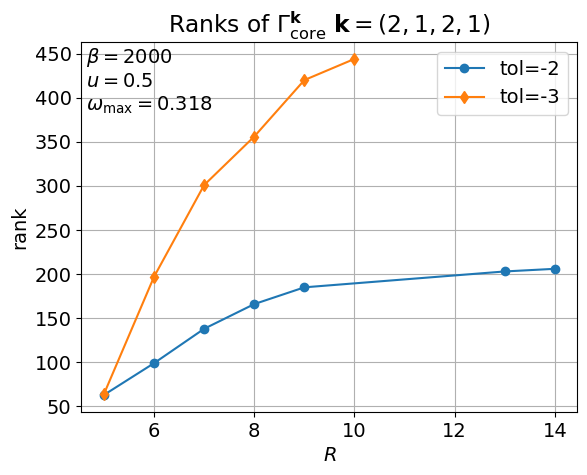

In [54]:
# load Keldysh vertex data

# tolerance 2
d21 = TCI4Keldysh.readJSON(onlyJSON(joinpath(kcspath, "V_KF_pch_tol2_iK6_R0509")))
d22 = TCI4Keldysh.readJSON(onlyJSON(joinpath(kcspath, "V_KF_RAMTEST_R13")))
d23 = TCI4Keldysh.readJSON(onlyJSON(joinpath(kcspath, "V_KF_RAMTEST_R14")))
ranks2 = vcat(d21["ranks"], d22["ranks"], d23["ranks"])
Rs2 = vcat(collect(5:9), [13,14])

# tolerance 3
d31 = TCI4Keldysh.readJSON(onlyJSON(joinpath(kcspath, "V_KF_pch_tol3_iK6_R0509")))
# d32 = TCI4Keldysh.readJSON(onlyJSON(joinpath(kcspath, "V_KF_RAMTEST_R13")))
# d33 = TCI4Keldysh.readJSON(onlyJSON(joinpath(kcspath, "V_KF_RAMTEST_R14")))
# ranks = vcat(d31["ranks"], d32["ranks"], d33["ranks"])
ranks3 = d31["ranks"]
Rs3 = collect(5:9)
push!(Rs3, 10)
push!(ranks3, 444)

fig, ax = subplots()
ax.plot(Rs2, ranks2; label="tol=-2", marker="o")
ax.plot(Rs3, ranks3; label="tol=-3", marker="d")
ax.set_xlabel(L"R")
ax.set_ylabel("rank")
ax.set_title(L"Ranks of $\Gamma_{\mathrm{core}}^{\mathbf{k}}$ $\mathbf{k}=(2,1,2,1)$")
ax.legend()
ax.grid(true)
annotate_topleft(ax, L"\beta=2000" * "\n" * L"u=0.5" * "\n" * L"ω_{\max}=0.318")
savefig("V_KF_ranks.pdf")
display(fig)

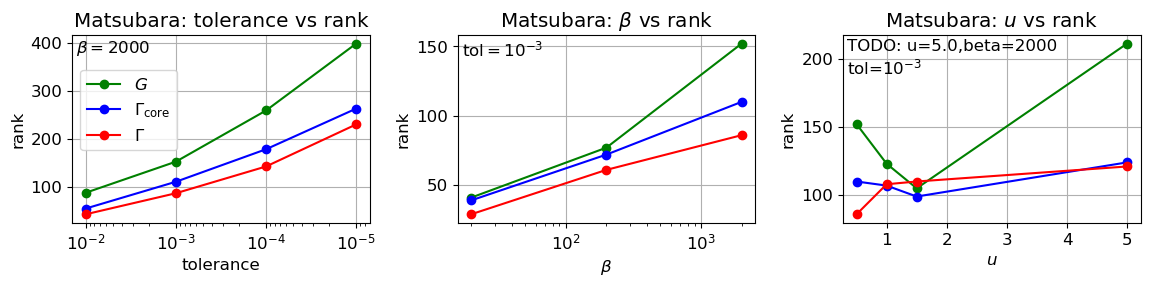

Python: None

In [25]:
# Matsubara: tolerance, beta and u vs. rank for full/core vertex + full correlator at R=10

# PSFpaths = [
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.05_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     ]

function Rrank(folder::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    Rs = d["Rs"]
    Rid = findfirst(isequal(R), Rs)
    return d["ranks"][Rid]
end

function Rrank(d::Dict, R::Int)
    Rs = d["Rs"]
    Rid = findfirst(isequal(R), Rs)
    return d["ranks"][Rid]
end

# plot
fig, axs = subplots(1, 3, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*1.3/5))
set_rcParams(12)

for ax in axs
    ax.grid(true)
end

R = 10

# tol vs rank
    # collect data
tol_int = -5:-2
tol_range = collect(10.0 .^ tol_int)
    # collect data
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]
for tol in tol_int
    folder = joinpath(basepath, "corrMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(corr_ranks, Rrank(d, R))

    folder = joinpath(basepath, "gamcoreMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(V_ranks, Rrank(d,R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(Vfull_ranks, Rrank(d,R))
end

axs[0].plot(tol_range, corr_ranks; color="green", marker="o", label=L"G")
axs[0].plot(tol_range, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[0].plot(tol_range, Vfull_ranks; color="red", marker="o", label=L"\Gamma")
axs[0].set_xscale("log")
axs[0].set_ylabel("rank")
axs[0].set_xlabel("tolerance")
axs[0].set_title("Matsubara: tolerance vs rank")
axs[0].invert_xaxis()
axs[0].legend(loc="center left", bbox_to_anchor=(0.0,0.6))
annotate_topleft(axs[0], L"\beta=2000")

# beta vs rank
    # collect data
betas = [20, 200, 2000]
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]

for beta in betas

    folder = joinpath(basepath, "corrMF_pch_tol3_beta$(beta)")
    push!(corr_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta$(beta)")
    push!(V_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta$(beta)")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[1].plot(betas, corr_ranks; color="green", marker="o", label=L"G")
axs[1].plot(betas, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[1].plot(betas, Vfull_ranks; color="red", marker="o", label=L"\Gamma")
axs[1].set_xscale("log")
axs[1].set_ylabel("rank")
axs[1].set_xlabel(L"\beta")
axs[1].set_title(L"Matsubara: $\beta$ vs rank")
annotate_topleft(axs[1], L"tol$=10^{-3}$")

# u vs rank
    # collect data, beta=2000, tol=1.e-3
us = [0.5, 1.0, 1.5, 5.0]
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]

folder = joinpath(basepath, "corrMF_pch_tol3_beta2000")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u1.0")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u1.5")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u5.0")
push!(corr_ranks, Rrank(folder, R))


folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=1.0_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=1.50_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=5.0_tol3")
push!(V_ranks, Rrank(folder, R))

folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
push!(Vfull_ranks, Rrank(folder, R))
for u in us[2:end]
    folder = joinpath(basepath, "fullvertexcMF_pch_tol3_u=$u")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[2].plot(us, corr_ranks; color="green", marker="o", label=L"G, \beta=2000")
axs[2].plot(us, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}, \tol=$10^{-3}$")
axs[2].plot(us, Vfull_ranks; color="red", marker="o", label=L"\Gamma, \tol=$10^{-3}$")
axs[2].set_ylabel("rank")
axs[2].set_xlabel(L"u")
axs[2].set_title(L"Matsubara: $u$ vs rank")
annotate_topleft(axs[2], "TODO: u=5.0,beta=2000" * "\n" * L"tol=$10^{-3}$")

# fig.legend(bbox_to_anchor=(0.9,0.9))
tight_layout()

display(fig)
savefig("MF_params_vs_rank.pdf")


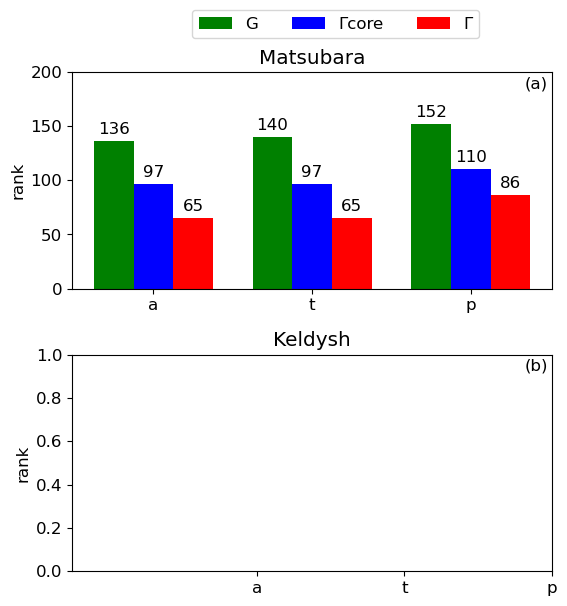

In [19]:
# channel dependence: Keldysh and Matsubara; three channels; correlator, core and full vertex

fig, axs = subplots(2, 1, figsize=(PLOT_COLUMN_INCH,  PLOT_COLUMN_INCH))

R = 10
# Matsubara
corr = Int[]
# TODO

V_ranks = Int[]
folder = joinpath(basepath, "gamcoreMF_ach_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
# TODO tch
folder = joinpath(basepath, "gamcoreMF_tch_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))

Vfull_ranks = Int[]
folder = joinpath(basepath, "fullvertex_MF_ach_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertex_MF_tch_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
push!(Vfull_ranks, Rrank(folder, R))

corr = Int[]
folder = joinpath(basepath, "corrMF_ach")
push!(corr, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_tch")
push!(corr, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_pch_tol3_beta2000")
push!(corr, Rrank(folder, R))

# plot
channels = ["a", "t", "p"]
barw = 0.25
cc = 0
x = collect(Base.OneTo(length(channels)))

data = [corr, V_ranks, Vfull_ranks]
labels = ["G", "Γcore", "Γ"]
colors = ["green", "blue", "red"]
# labels = ["one", "two", "three"]
handles = []
for (ic, c) in enumerate(channels)
    offset = barw * cc
    rects = axs[0].bar(x .+ offset, data[ic], barw, label=labels[ic], color=colors[ic])
    axs[0].bar_label(rects, padding=3)
    push!(handles, rects)
    cc += 1
end

axs[0].set_title("Matsubara")
axs[1].set_title("Keldysh")
axs[0].set_ylabel("rank")
axs[1].set_ylabel("rank")
axs[0].set_xticks(x .+ barw, channels)
axs[1].set_xticks(x .+ barw, channels)
# axs[0].legend(loc="upper left", ncols=3)
axs[0].set_ylim(0, 200)
abc_annotate(axs)

lgd = fig.legend(handles=handles, ncols=3, bbox_to_anchor=(0.85,1.05))
fig.tight_layout()
save_bbox(
    "channel_comparison.pdf",
    fig,
    lgd
)
display(fig)
